# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [26]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [27]:
print(f"Tesla dataframe shape: {df_tesla.shape}")
print(f"Tesla dataframe rows: {df_tesla.shape[0]}")
print(f"Tesla dataframe columns: {df_tesla.shape[1]}\t {df_tesla.columns}")
print(f"Tesla dataframe describe: \n{df_tesla.describe()}")
print(f"The data has monthly periodicity")

Tesla dataframe shape: (124, 3)
Tesla dataframe rows: 124
Tesla dataframe columns: 3	 Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
Tesla dataframe describe: 
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
The data has monthly periodicity


In [28]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [29]:
print(f"Unemployment dataframe shape: {df_unemployment.shape}")
print(f"Unemployment dataframe rows: {df_unemployment.shape[0]}")
print(f"Unemployment dataframe columns: {df_unemployment.shape[1]}\t {df_unemployment.columns}")
print(f"Unemployment dataframe describe: \n{df_unemployment.describe()}")
print(f"The data has monthly periodicity")

Unemployment dataframe shape: (181, 3)
Unemployment dataframe rows: 181
Unemployment dataframe columns: 3	 Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
Unemployment dataframe describe: 
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000
The data has monthly periodicity


In [30]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [31]:
print(f"BTC Price dataframe shape: {df_btc_price.shape}")
print(f"BTC Price dataframe rows: {df_btc_price.shape[0]}")
print(f"BTC Price dataframe columns: {df_btc_price.shape[1]}\t {df_btc_price.columns}")
print(f"BTC Price dataframe describe: \n{df_btc_price.describe()}")
print(f"The data has daily periodicity")

BTC Price dataframe shape: (2204, 3)
BTC Price dataframe rows: 2204
BTC Price dataframe columns: 3	 Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
BTC Price dataframe describe: 
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10
The data has daily periodicity


In [32]:
print(f"BTC Search dataframe shape: {df_btc_search.shape}")
print(f"BTC Search dataframe rows: {df_btc_search.shape[0]}")
print(f"BTC Search dataframe columns: {df_btc_search.shape[1]}\t {df_btc_search.columns}")
print(f"BTC Search dataframe describe: \n{df_btc_search.describe()}")
print(f"The data has monthly periodicity")

BTC Search dataframe shape: (73, 2)
BTC Search dataframe rows: 73
BTC Search dataframe columns: 2	 Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
BTC Search dataframe describe: 
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
The data has monthly periodicity


In [33]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [34]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [35]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [36]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
print(f'Missing values: {df_btc_price[df_btc_price.CLOSE.isna()]}')

Number of missing values: 2
Missing values:             DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


**Challenge**: Remove any missing values that you found. 

In [37]:
df_btc_price = df_btc_price.dropna()

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [38]:
print(df_tesla.dtypes)
print(df_btc_search.dtypes)
print(df_btc_price.dtypes)
print(df_unemployment.dtypes)

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object
MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object
DATE       object
CLOSE     float64
VOLUME    float64
dtype: object
MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object


In [39]:
print(type(df_tesla.MONTH[0]))
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])

<class 'str'>


In [40]:
print(df_tesla.dtypes)
print(df_btc_search.dtypes)
print(df_btc_price.dtypes)
print(df_unemployment.dtypes)

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object
MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object
DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [41]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [42]:
# Create locators for ticks on the time axis

In [43]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'TSLA Stock Price (USD)')

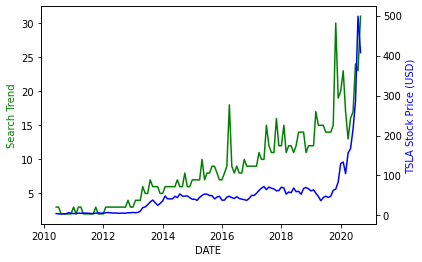

In [44]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color='g')
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 'b')

ax1.set_xlabel("DATE")
ax1.set_ylabel("Search Trend", color="green")
ax2.set_ylabel("TSLA Stock Price (USD)", color="blue")

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'TSLA Stock Price (USD)')

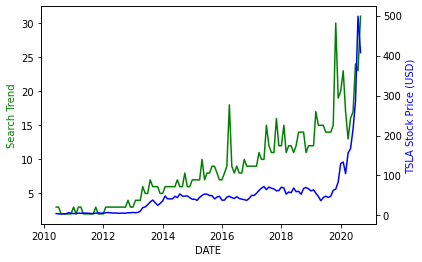

In [45]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color='g')
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 'b')

ax1.set_xlabel("DATE")
ax1.set_ylabel("Search Trend", color="green")
ax2.set_ylabel("TSLA Stock Price (USD)", color="blue")

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

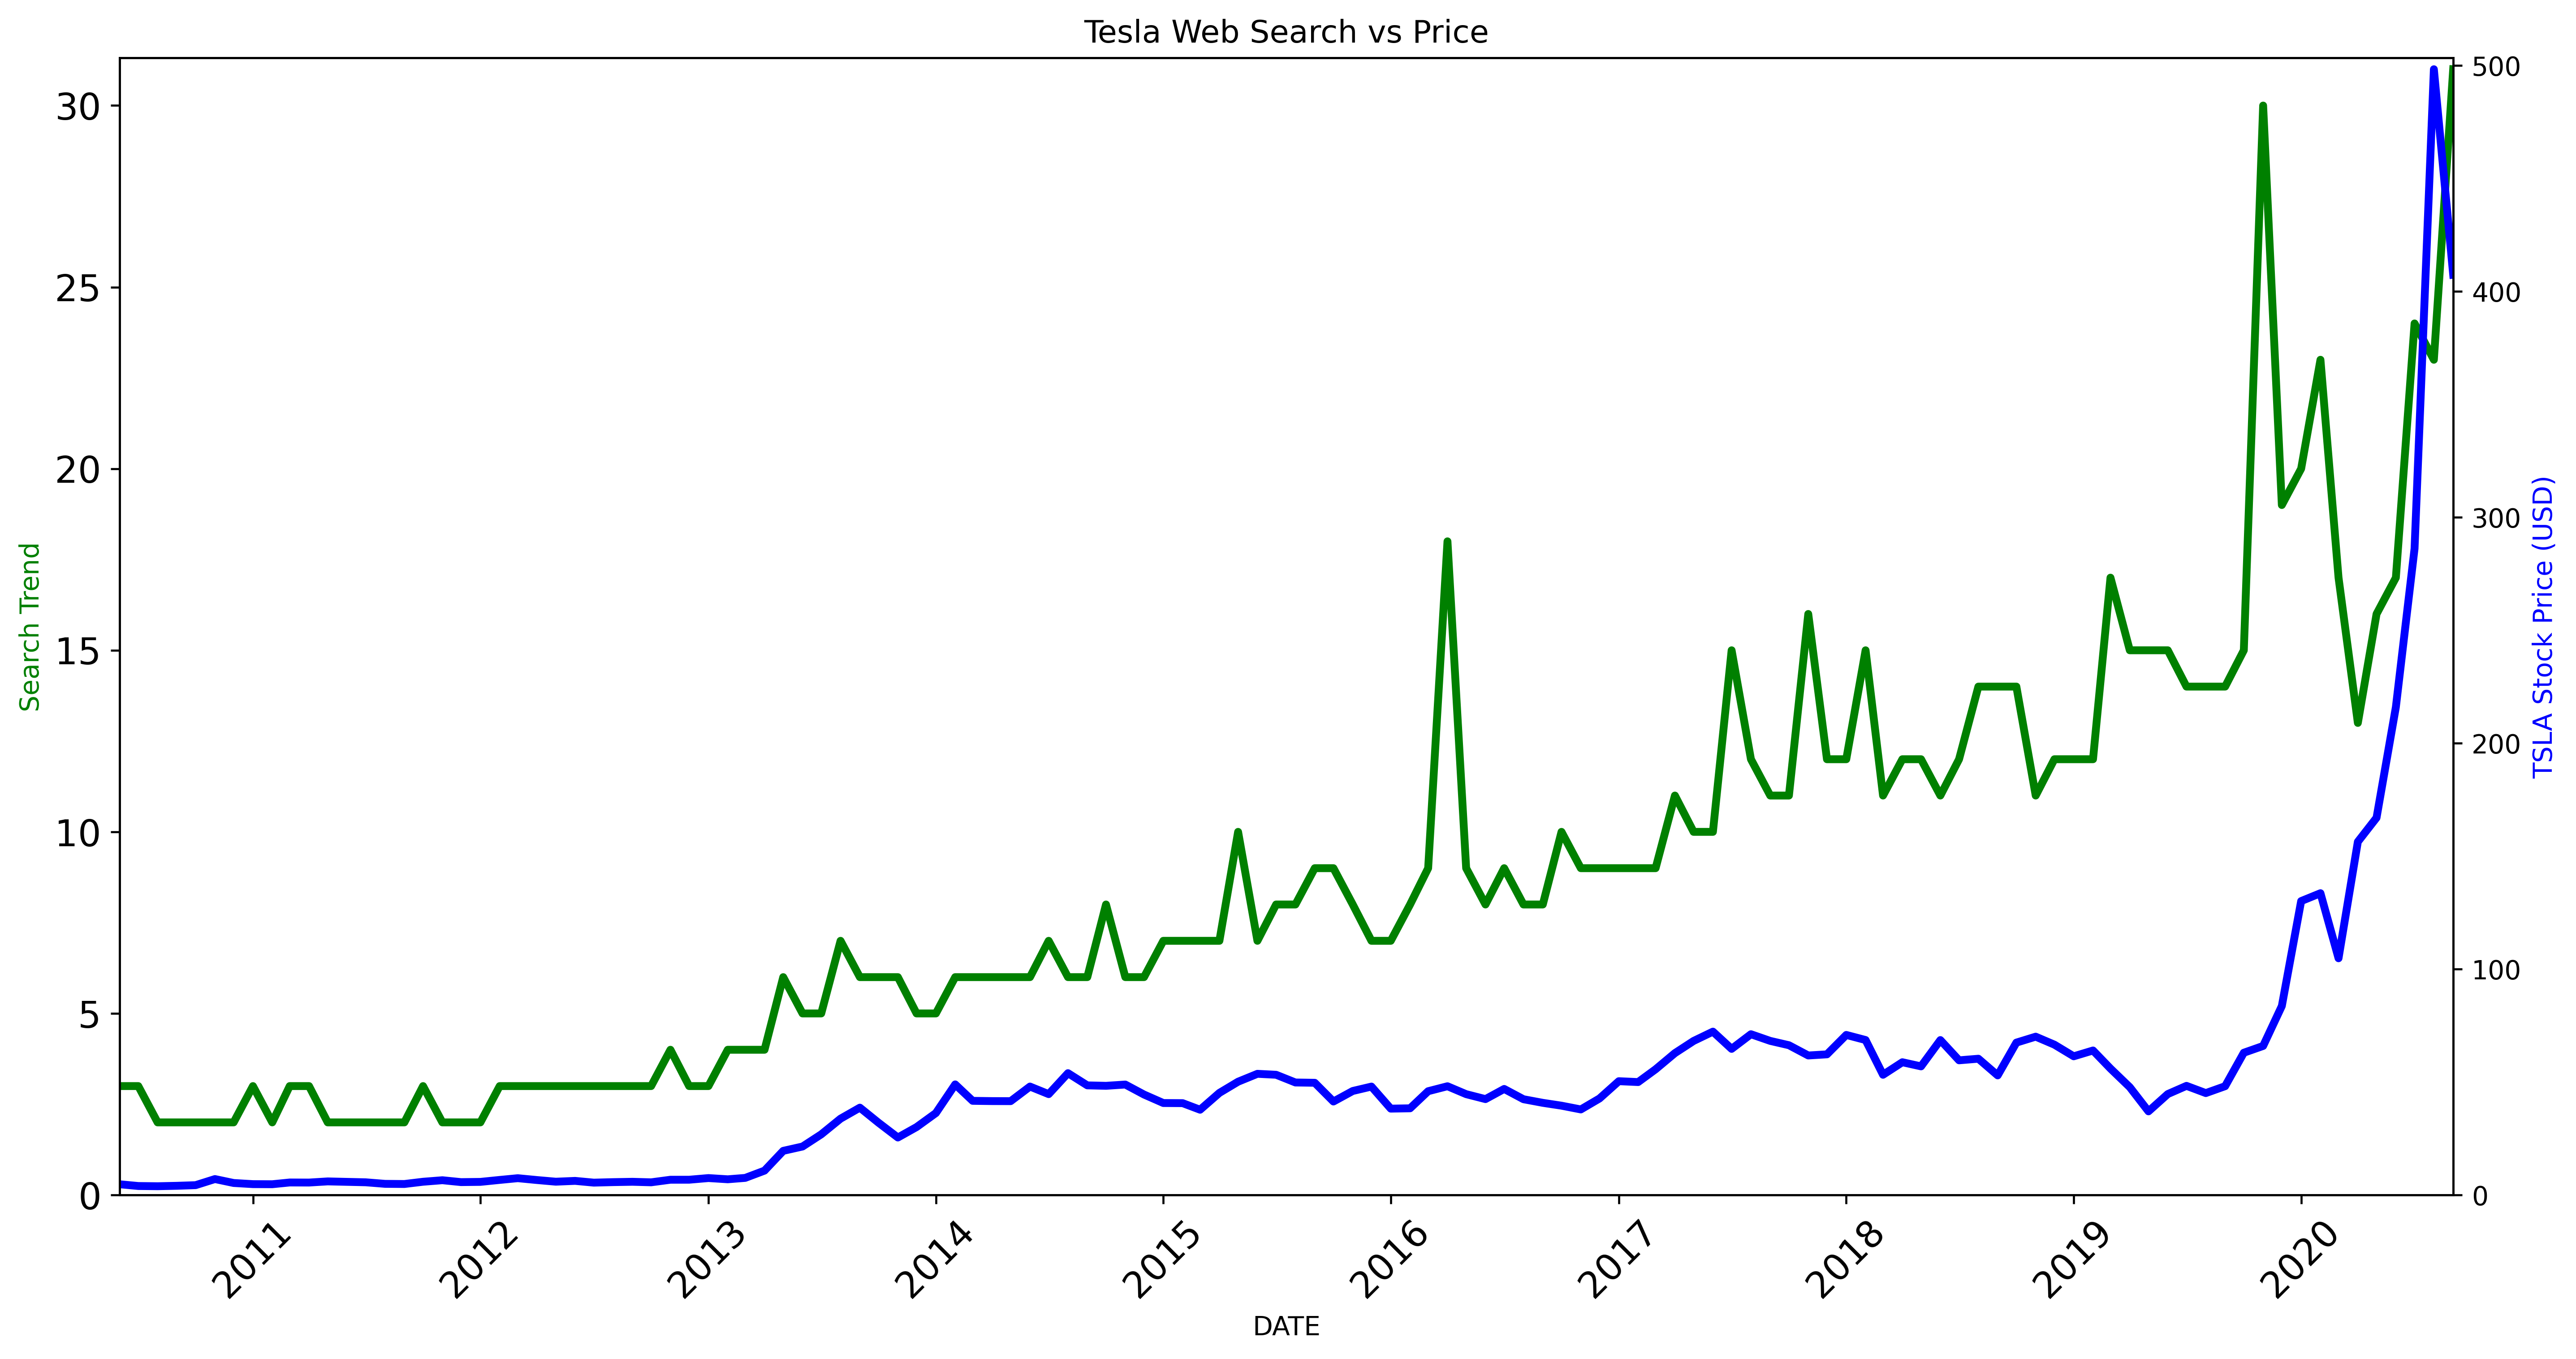

In [46]:
plt.figure(figsize=(16,8), dpi=420) 
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Tesla Web Search vs Price")

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color='g', linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 'b', linewidth=3)

ax1.set_xlabel("DATE")
ax1.set_ylabel("Search Trend", color="green")
ax2.set_ylabel("TSLA Stock Price (USD)", color="blue")

ax1.set_xlim(xmin=df_tesla["MONTH"].min(), xmax=df_tesla["MONTH"].max())
ax2.set_xlim(xmin=df_tesla["MONTH"].min(), xmax=df_tesla["MONTH"].max())
ax1.set_ylim(ymin=0, ymax=df_tesla["TSLA_WEB_SEARCH"].max()*1.01)
ax2.set_ylim(ymin=0, ymax=df_tesla["TSLA_USD_CLOSE"].max()*1.01)

plt.show()

How to add tick formatting for dates on the x-axis. 

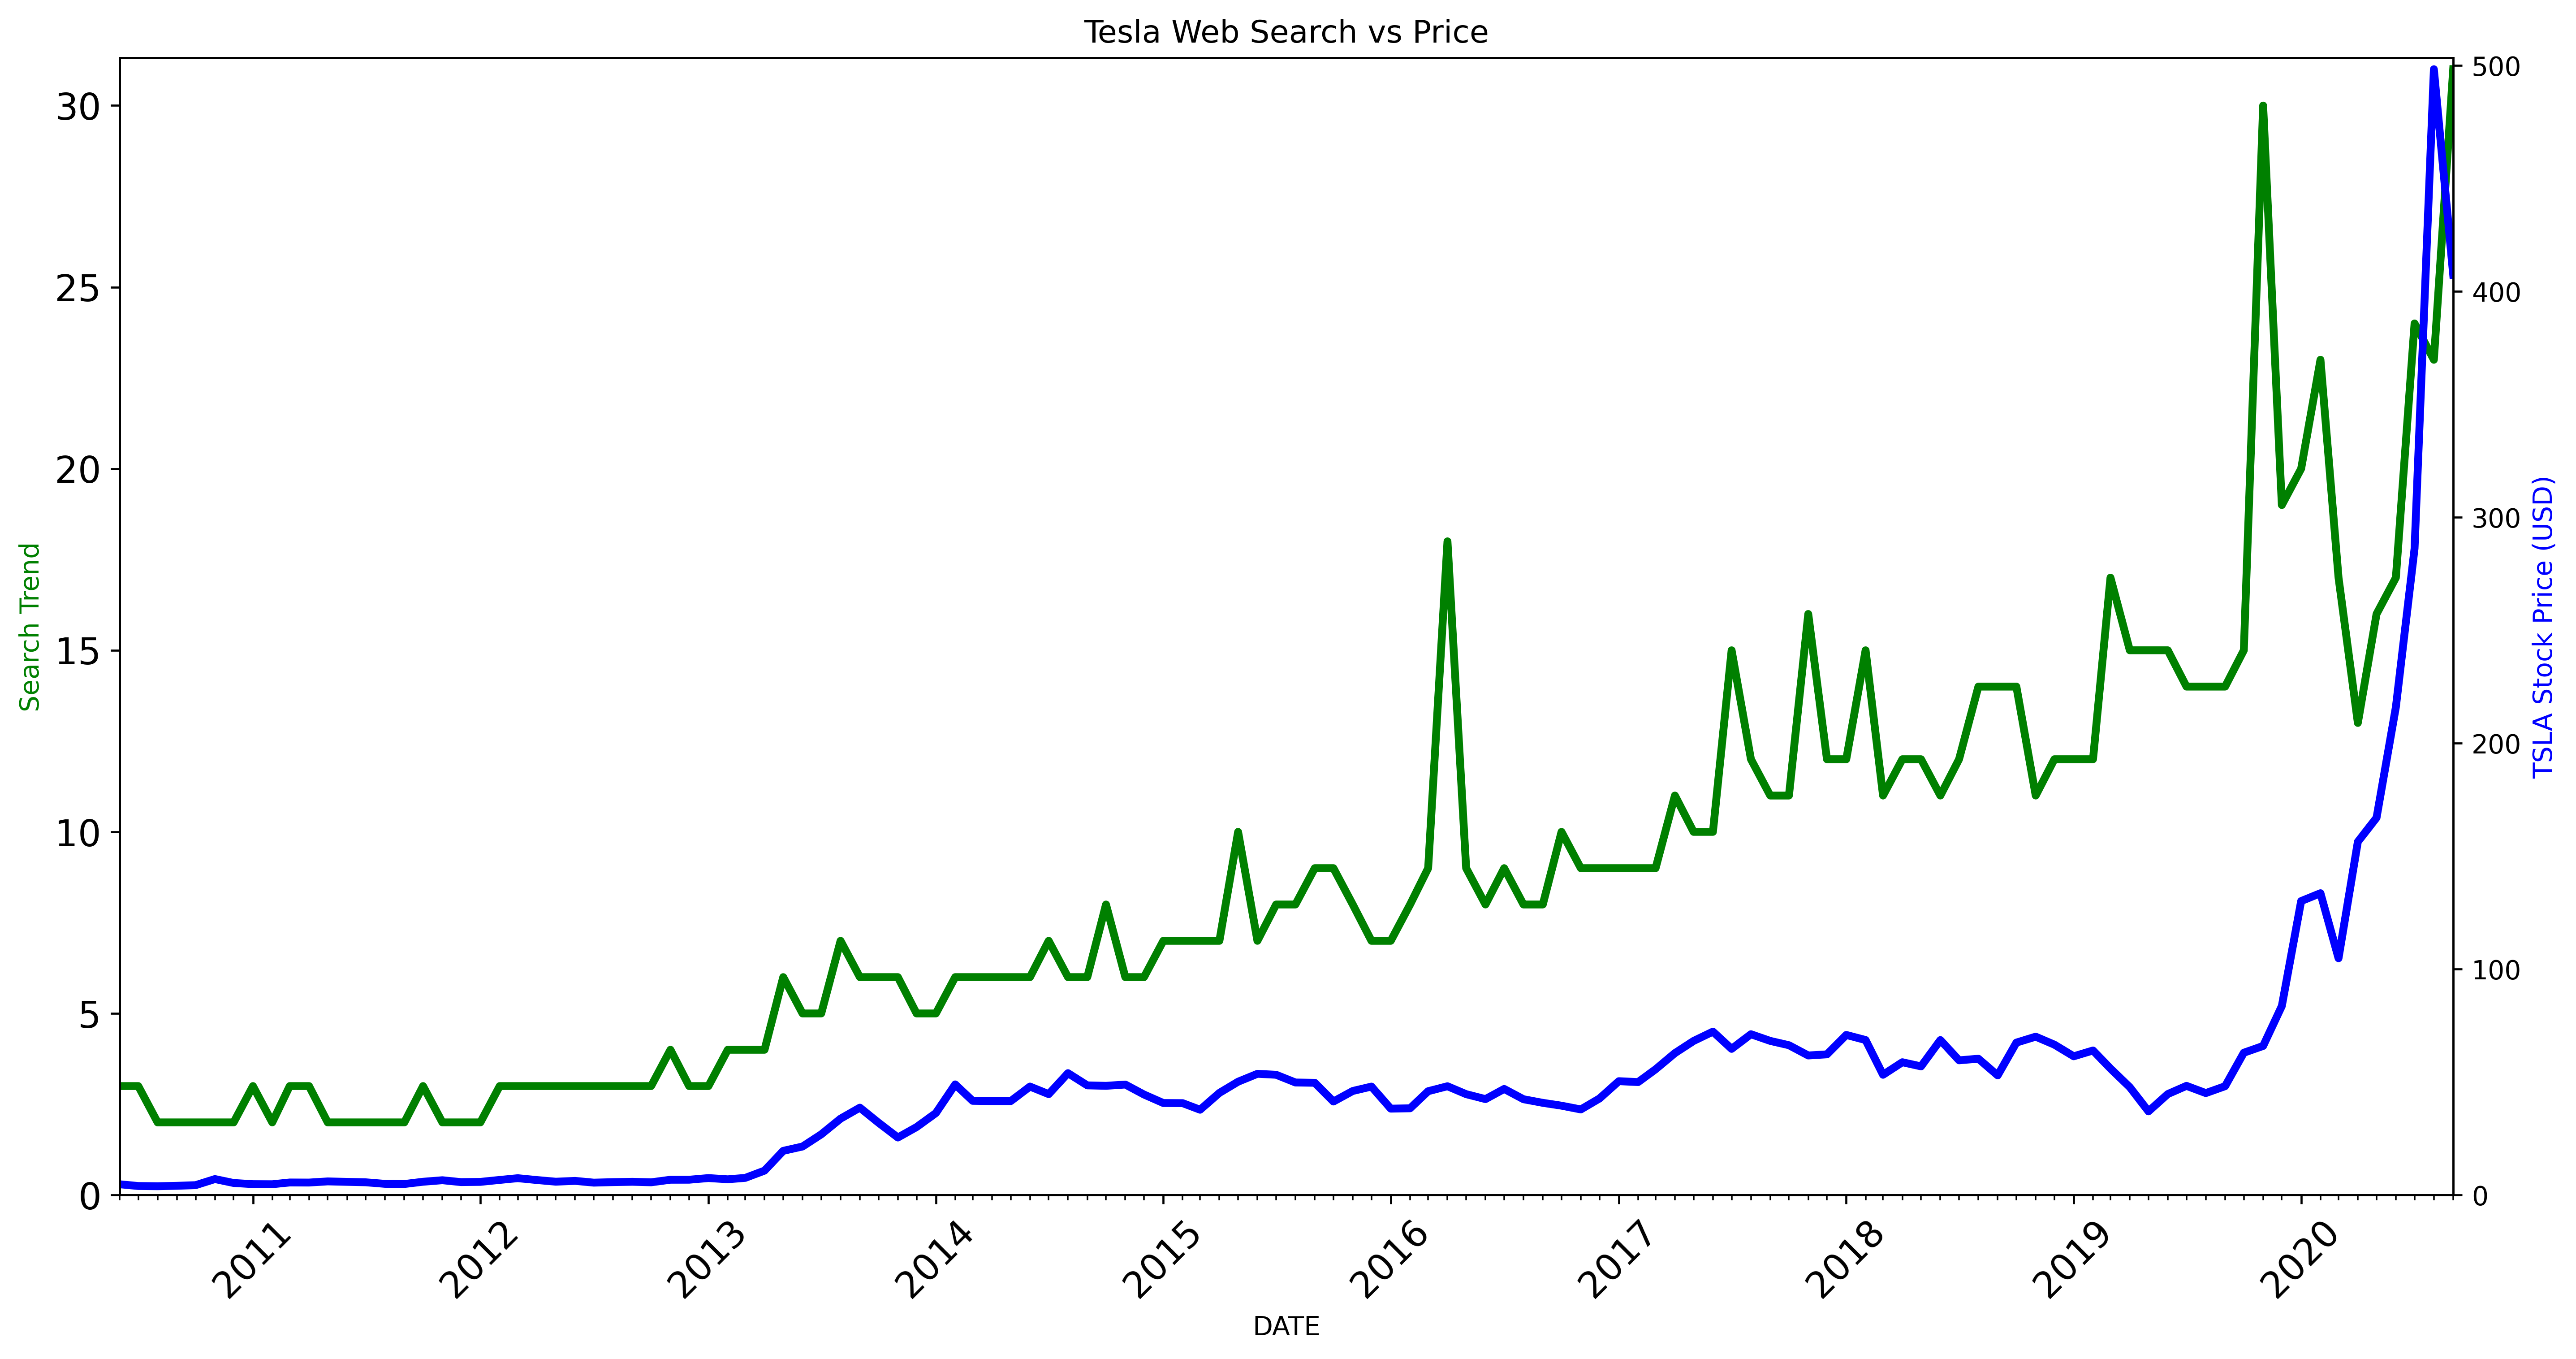

In [47]:
import matplotlib.dates as mdates

plt.figure(figsize=(16,8), dpi=420) 
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Tesla Web Search vs Price")

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color='g', linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 'b', linewidth=3)

ax1.set_xlabel("DATE")
ax1.set_ylabel("Search Trend", color="green")
ax2.set_ylabel("TSLA Stock Price (USD)", color="blue")

ax1.set_xlim(xmin=df_tesla["MONTH"].min(), xmax=df_tesla["MONTH"].max())
ax2.set_xlim(xmin=df_tesla["MONTH"].min(), xmax=df_tesla["MONTH"].max())
ax1.set_ylim(ymin=0, ymax=df_tesla["TSLA_WEB_SEARCH"].max()*1.01)
ax2.set_ylim(ymin=0, ymax=df_tesla["TSLA_USD_CLOSE"].max()*1.01)

plt.show()


### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

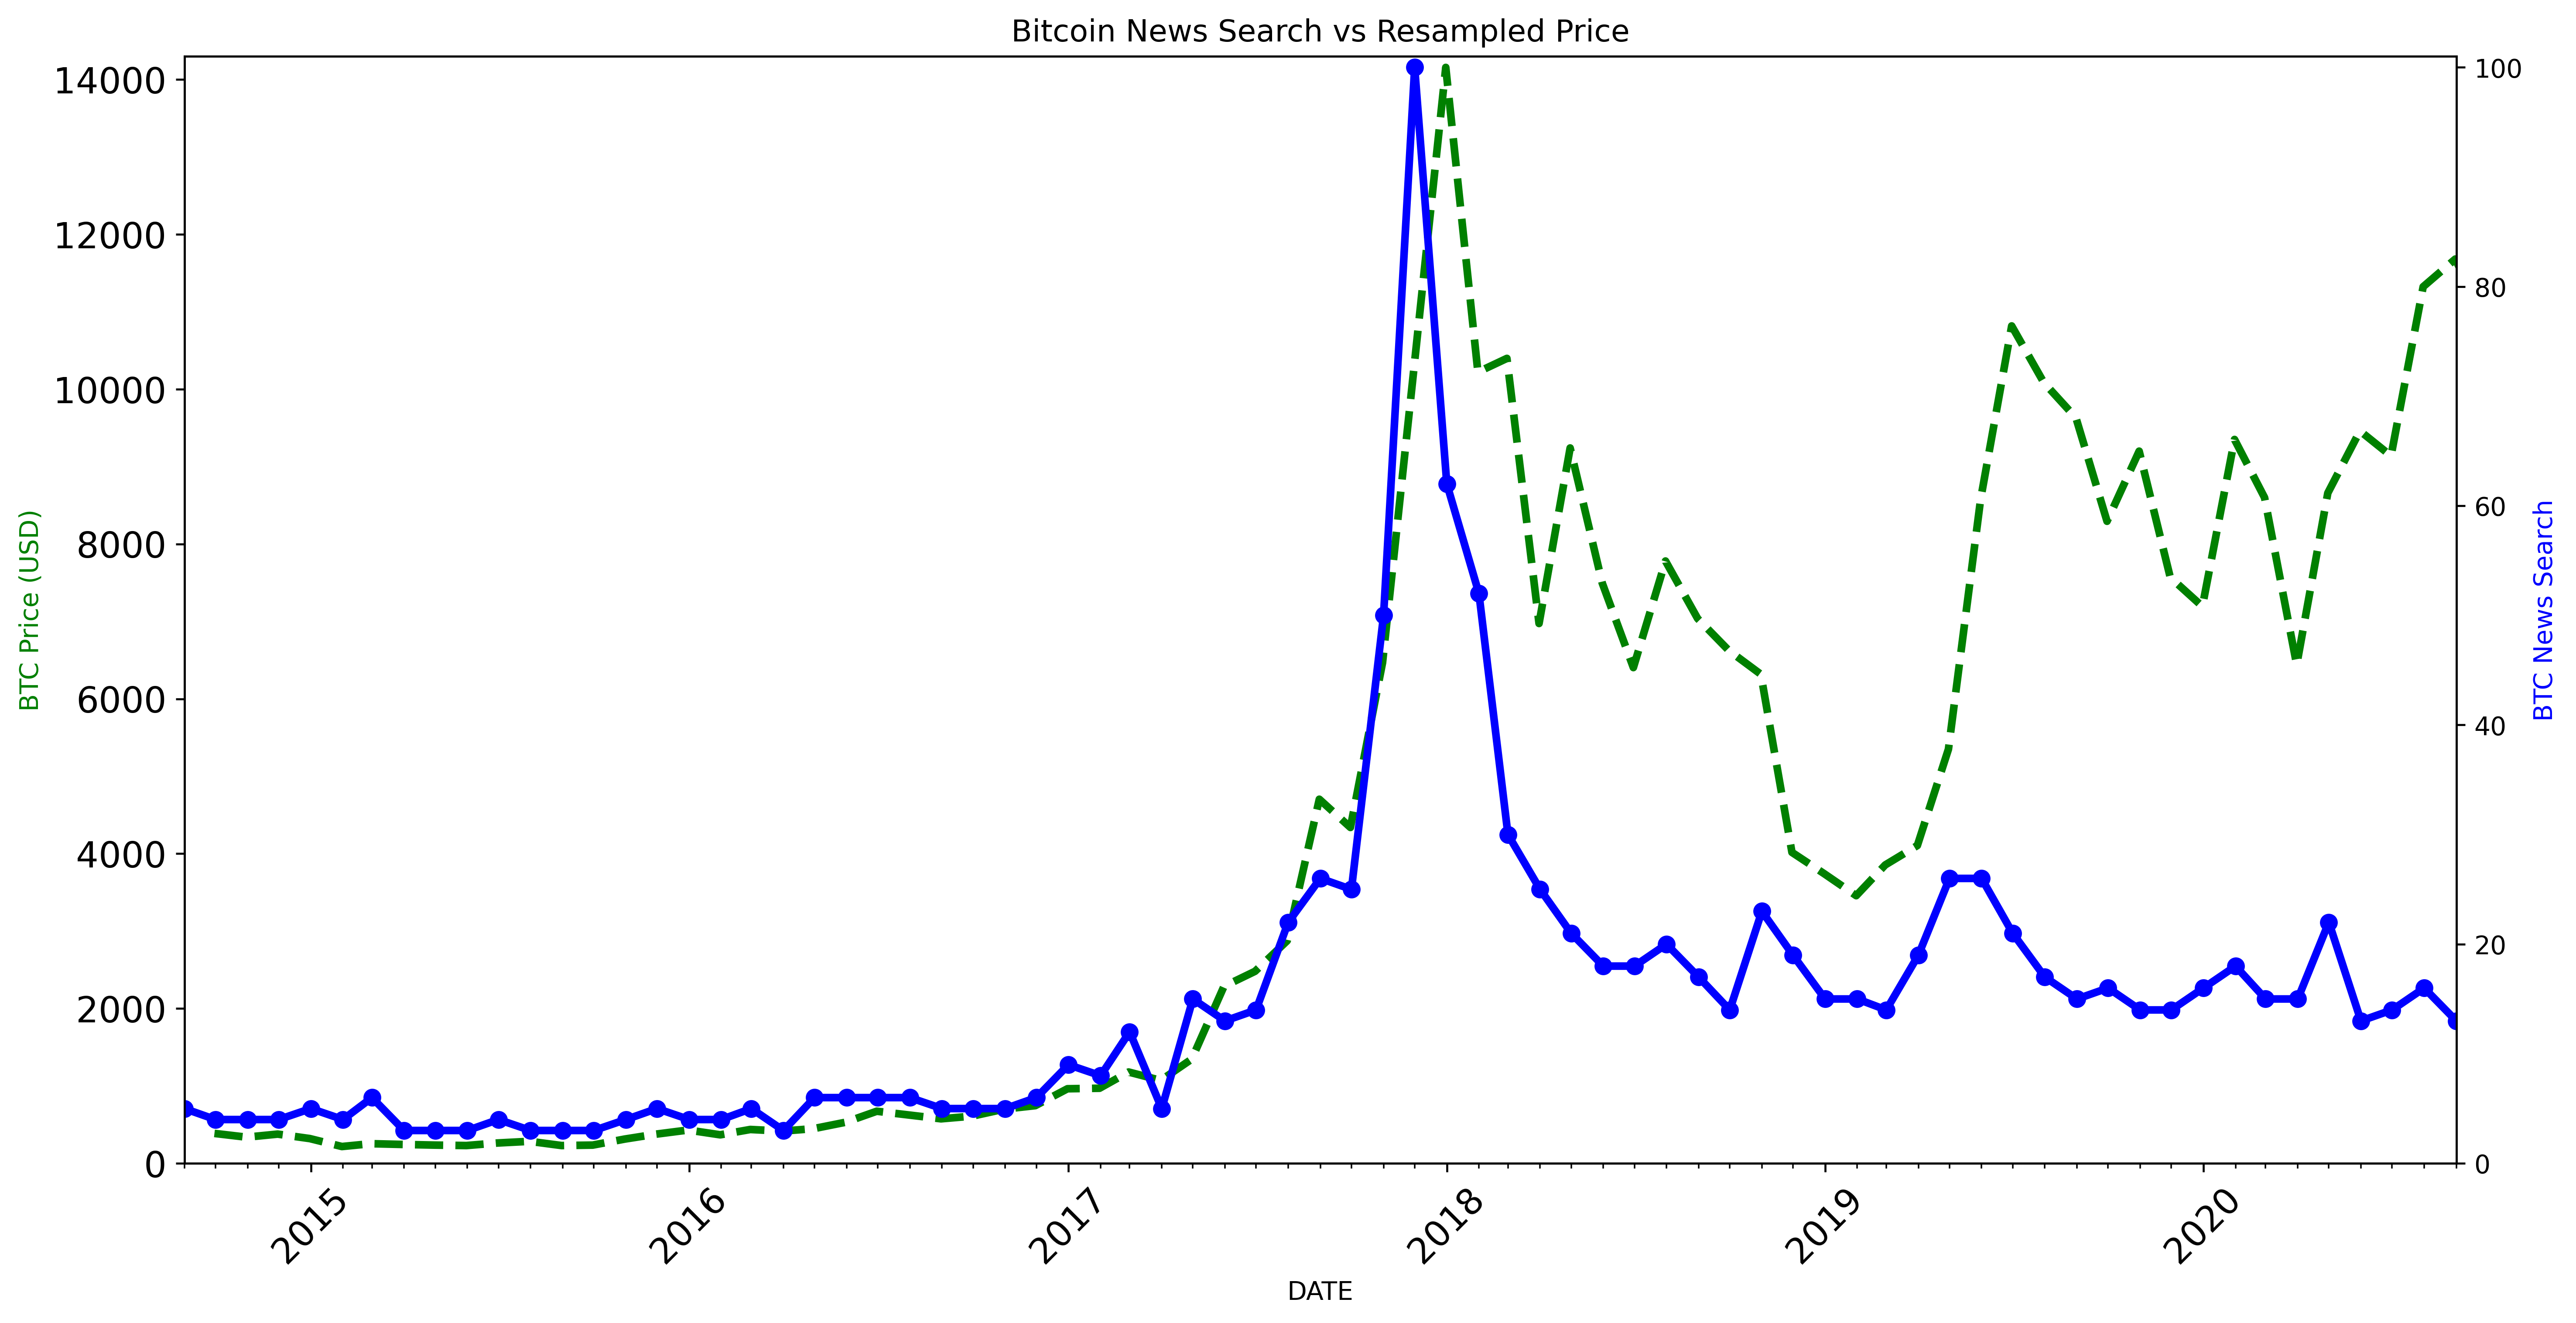

In [48]:
import matplotlib.dates as mdates

plt.figure(figsize=(16,8), dpi=420) 
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Bitcoin News Search vs Resampled Price")

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_monthly["DATE"], df_btc_monthly["CLOSE"], color='g', linewidth=3, linestyle='dashed')
ax2.plot(df_btc_search["MONTH"], df_btc_search["BTC_NEWS_SEARCH"], 'b', linewidth=3, marker="o")

ax1.set_xlabel("DATE")
ax1.set_ylabel("BTC Price (USD)", color="green")
ax2.set_ylabel("BTC News Search", color="blue")

ax1.set_xlim(xmin=df_btc_monthly["DATE"].min(), xmax=df_btc_monthly["DATE"].max())
ax2.set_xlim(xmin=df_btc_search["MONTH"].min(), xmax=df_btc_search["MONTH"].max())
ax1.set_ylim(ymin=0, ymax=df_btc_monthly["CLOSE"].max()*1.01)
ax2.set_ylim(ymin=0, ymax=df_btc_search["BTC_NEWS_SEARCH"].max()*1.01)

plt.show()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

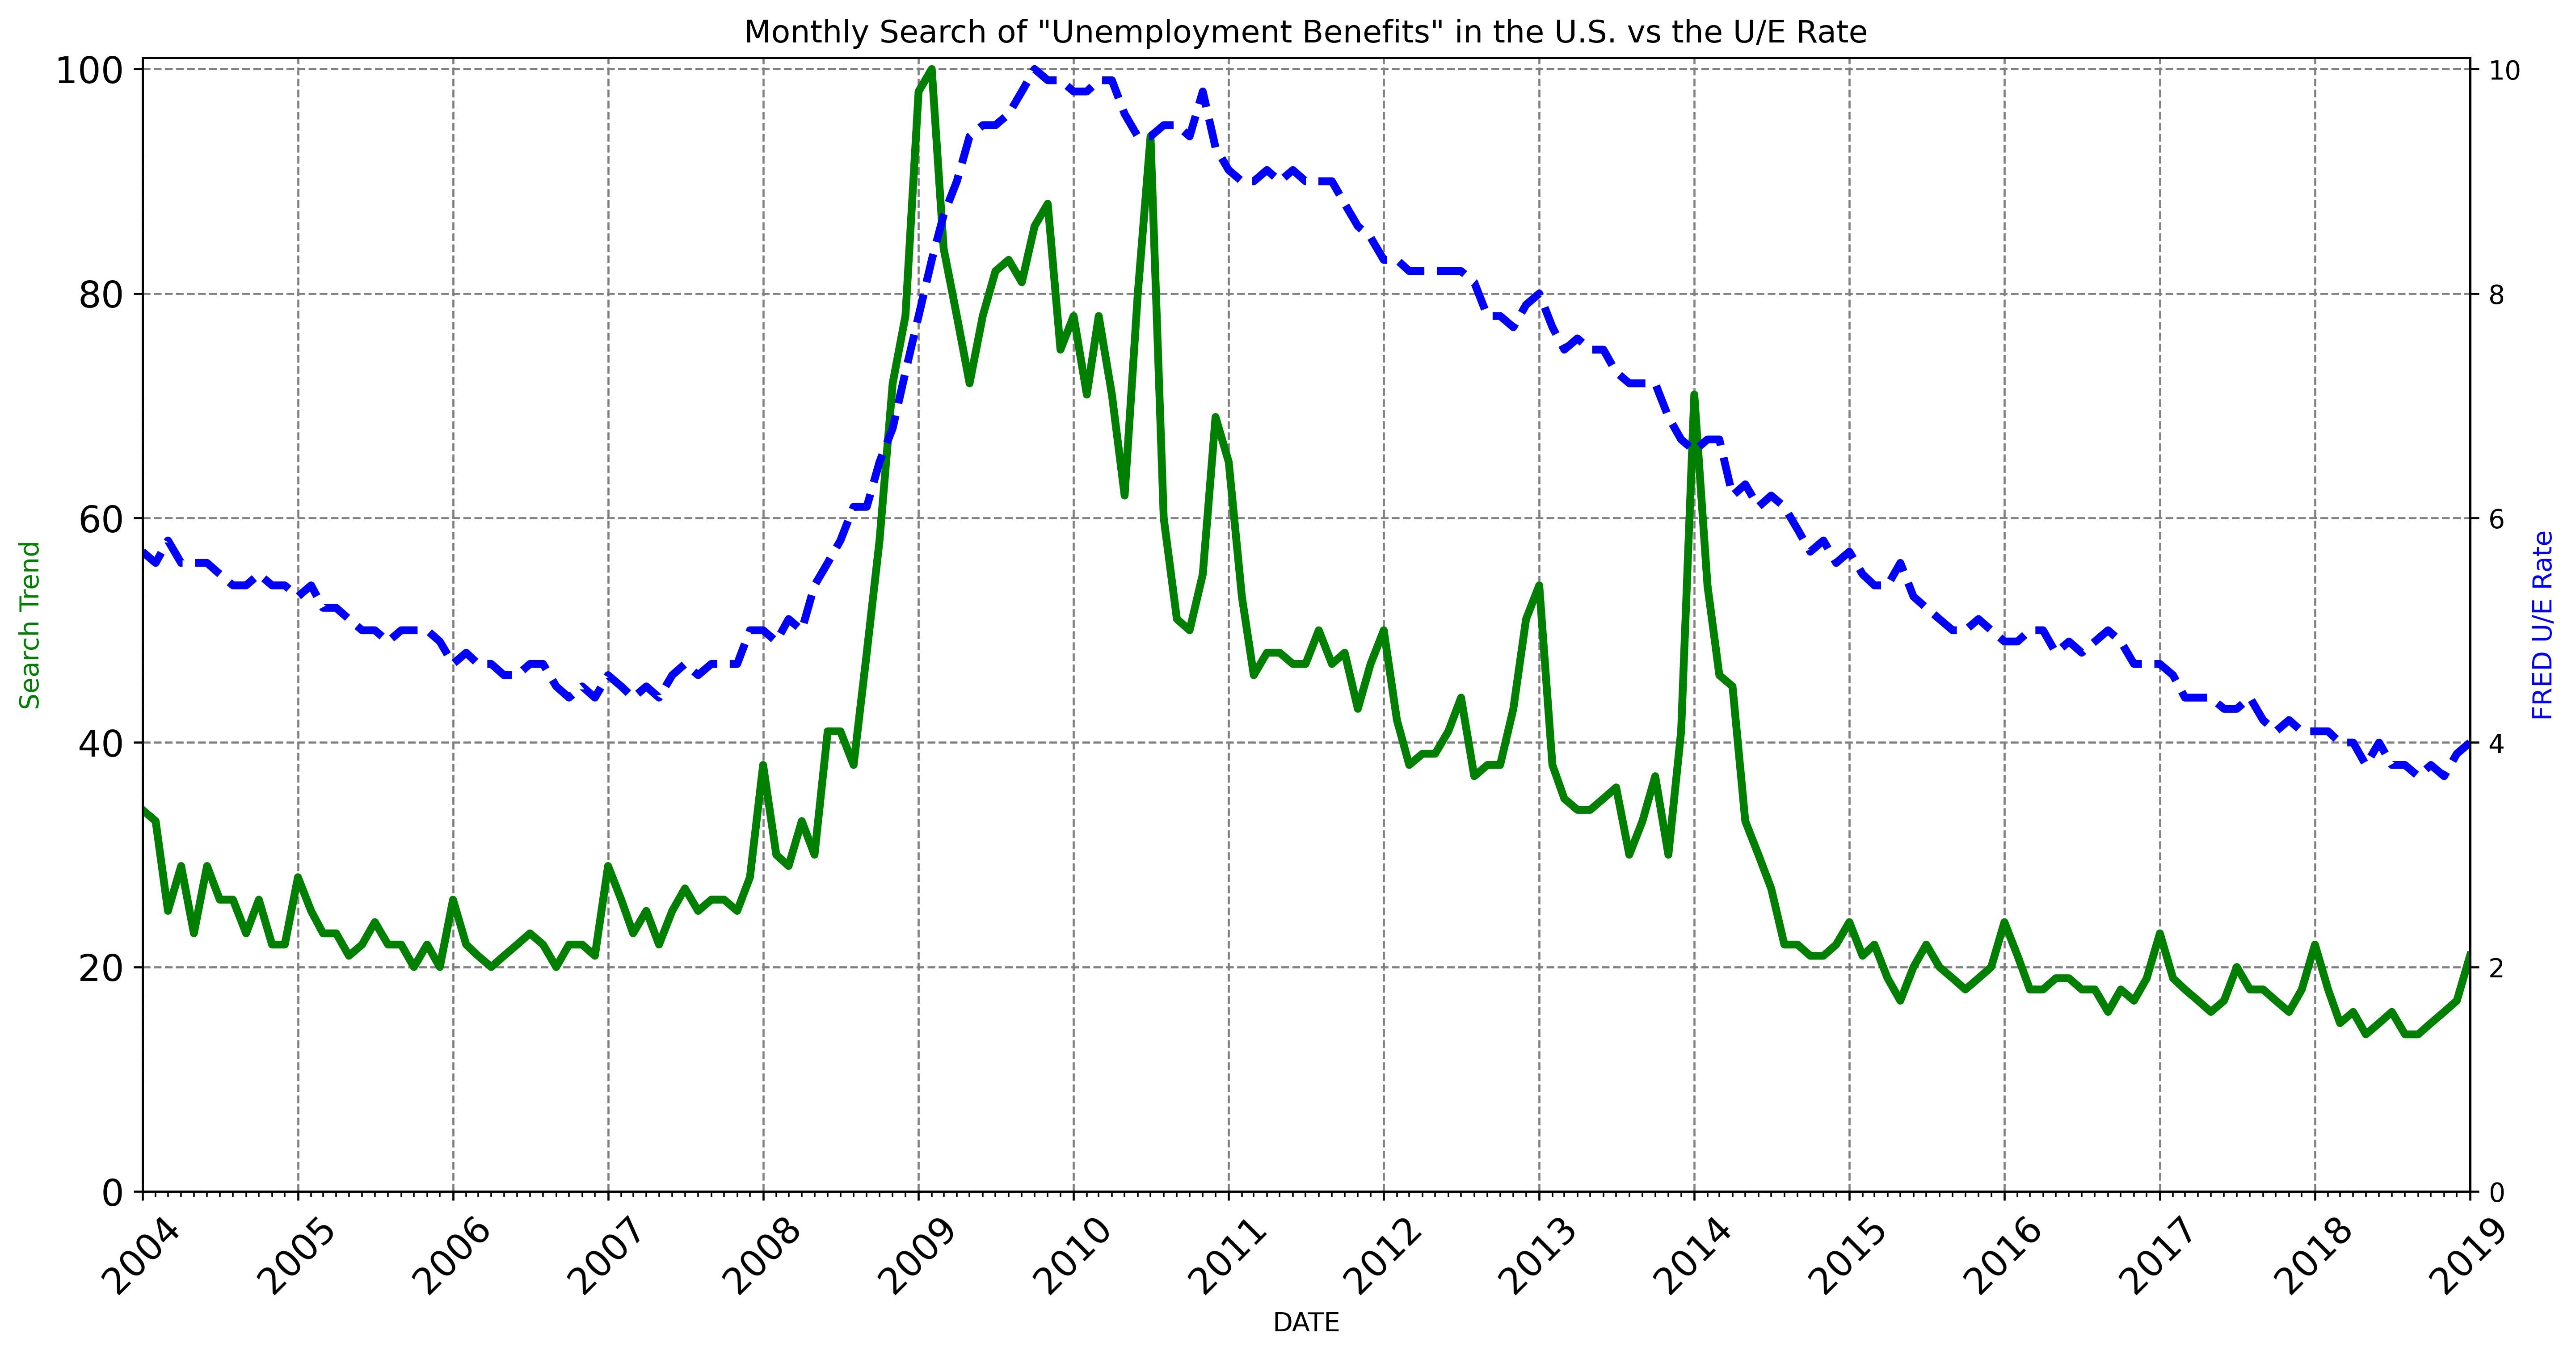

In [52]:
plt.figure(figsize=(16,8), dpi=420) 
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], color='g', linewidth=3)
ax2.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], 'b', linewidth=3, linestyle="--")

ax1.set_xlabel("DATE")
ax1.set_ylabel("Search Trend", color="green")
ax2.set_ylabel("FRED U/E Rate", color="blue")

ax1.set_xlim(xmin=df_unemployment["MONTH"].min(), xmax=df_unemployment["MONTH"].max())
ax2.set_xlim(xmin=df_unemployment["MONTH"].min(), xmax=df_unemployment["MONTH"].max())
ax1.set_ylim(ymin=0, ymax=df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()*1.01)
ax2.set_ylim(ymin=0, ymax=df_unemployment["UNRATE"].max()*1.01)

ax1.grid(color='grey', linestyle='--')

plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


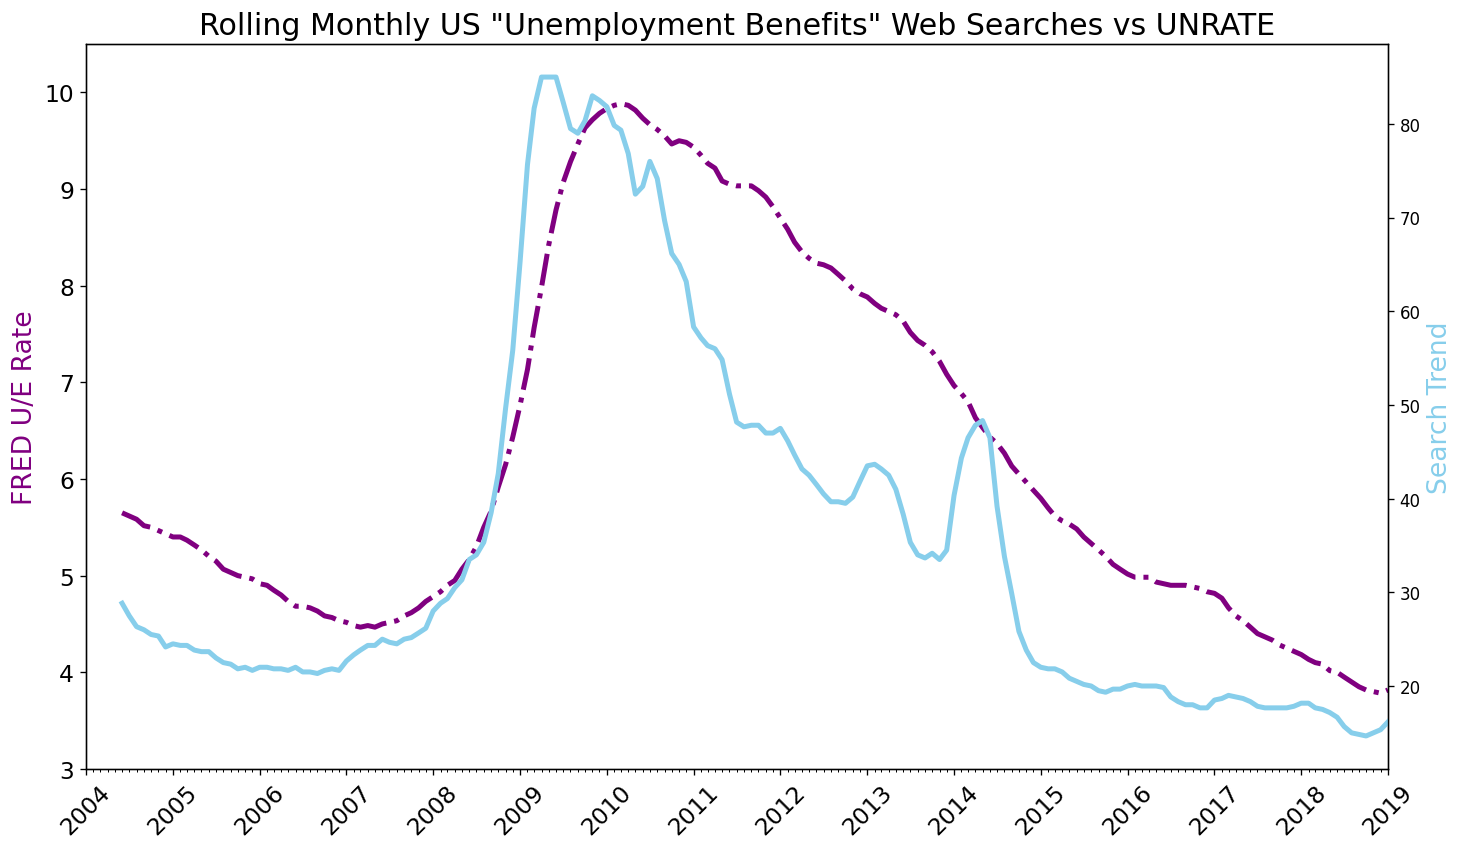

In [67]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

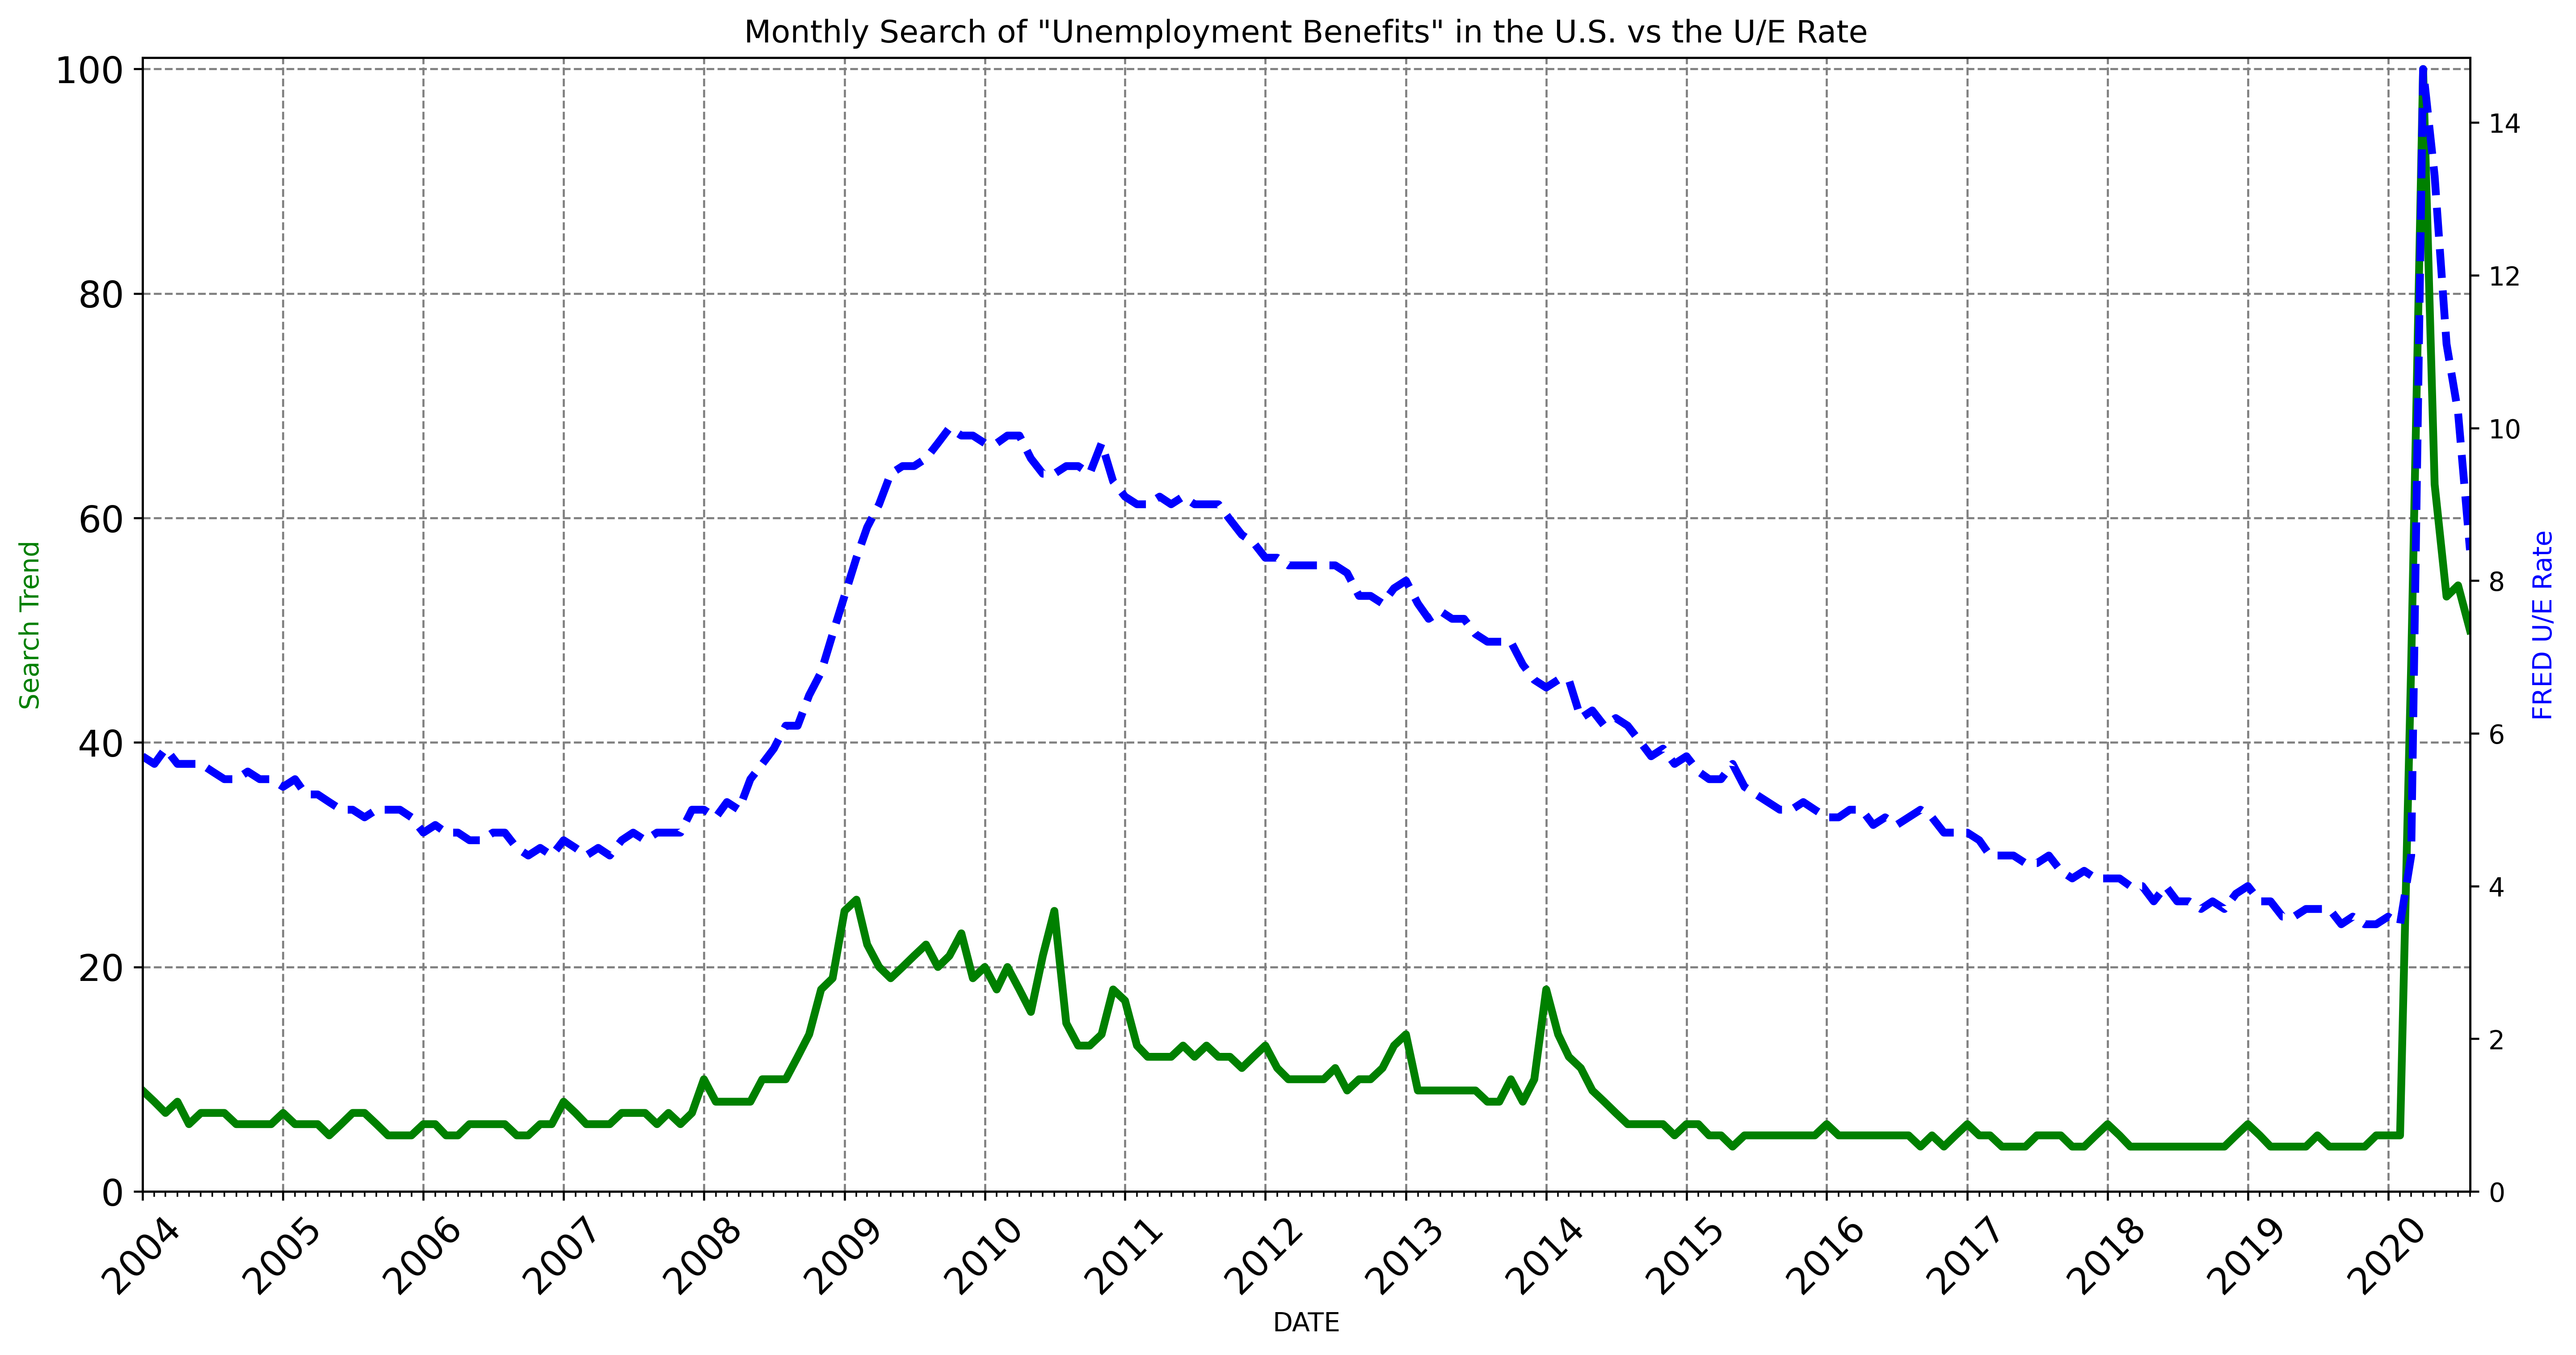

In [68]:

df_unemployment_incl_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_incl_2020["MONTH"] = pd.to_datetime(df_unemployment_incl_2020["MONTH"])

plt.figure(figsize=(16,8), dpi=420) 
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the x-axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment_incl_2020["MONTH"], df_unemployment_incl_2020["UE_BENEFITS_WEB_SEARCH"], color='g', linewidth=3)
ax2.plot(df_unemployment_incl_2020["MONTH"], df_unemployment_incl_2020["UNRATE"], 'b', linewidth=3, linestyle="--")

ax1.set_xlabel("DATE")
ax1.set_ylabel("Search Trend", color="green")
ax2.set_ylabel("FRED U/E Rate", color="blue")

ax1.set_xlim(xmin=df_unemployment_incl_2020["MONTH"].min(), xmax=df_unemployment_incl_2020["MONTH"].max())
ax2.set_xlim(xmin=df_unemployment_incl_2020["MONTH"].min(), xmax=df_unemployment_incl_2020["MONTH"].max())
ax1.set_ylim(ymin=0, ymax=df_unemployment_incl_2020["UE_BENEFITS_WEB_SEARCH"].max()*1.01)
ax2.set_ylim(ymin=0, ymax=df_unemployment_incl_2020["UNRATE"].max()*1.01)

ax1.grid(color='grey', linestyle='--')

plt.show()